In [8]:
import mmap
f = open('./log/postgresql-2017-07-19_170344.log', 'r')
m = mmap.mmap(f.fileno(), 0, access=mmap.ACCESS_READ)

In [55]:
m.seek(0)

In [56]:
ind = m.find(b':[postgres]:')

m.seek(ind)
while (m[m.tell(): m.tell()+1] != b'['):
       print(m[m.tell()])
       m.seek(-1, 1)

ind_process = m.tell()
process_id = m[ind_process+1:ind-1].decode()
print('now the position is: %d\n' % m.tell())
print('process_id is %s\n' % process_id)

m.seek(-1, 1)
while (m[m.tell(): m.tell()+1] != b'['):
       print(m[m.tell()])
       m.seek(-1, 1)

ind_app = m.tell()
app_name = m[ind_app+1:ind_process-3].decode()
print('now the position is: %d\n' % m.tell())
print('application name is %s\n' % app_name)

ind = ind + 11
m.seek(ind)
while (m[m.tell(): m.tell()+1] != b']'):
       print(m[m.tell()])
       m.seek(1, 1)


ind_session = m.tell()
session_id = m[ind+2: ind_session].decode()
print('now the position is: %d\n' % m.tell())
print('session id is %s\n' % session_id)

print('now the position is: %d\n' % m.tell())
ind = m.find(b'duration') + 10
ind_time = m.find(b'ms')
duration = m[ind:ind_time-1].decode()
print('now the position is: %d\n' % m.tell())
print('duration is %s\n' % duration)



58
93
52
52
49
56
now the position is: 38

process_id is 8144

58
93
93
110
119
111
110
107
110
117
now the position is: 27

application name is unknown

58
91
50
now the position is: 58

session id is 2

now the position is: 58

now the position is: 58

duration is 1715306.084



In [57]:
res_name = process_id + '_' + session_id
with open('./res/'+res_name, 'wt') as resf:
       resf.write('{\n')
       resf.write('"'+'Application Name'+'": ' +'"'+app_name+'",\n')
       resf.write('"'+'Process Id'+'": ' +'"'+process_id+'",\n')
       resf.write('"'+'Session Id'+'": ' +'"'+session_id+'",\n')
       resf.write('"'+'Duration'+'": ' +'"'+duration+'",\n')

       m.readline()
       m.readline()

       while True:
              line = m.readline().decode()
              ind = line.find('CST]:[[')
              if (ind < 0):
                     resf.write(line.decode())
              else:
                     continue
                     
                     
              

       
       
       

In [2]:
from pprint import pprint
from collections import defaultdict
import json
import flatdict
RAW_FILE = 'res/8144_2'
                                     
                                     

In [2]:
    with open(RAW_FILE, 'r') as f:
        data = json.load(f)


In [7]:
a = json.loads('[111111111111111111111111111111111111111111111]')

In [10]:
print(a[0]+1)

111111111111111111111111111111111111111111112


In [5]:
with open('./res/8144_3', 'r') as f:
       data = json.load(f)
                                     

In [8]:
print(data)

{'Run Time': '1715309.398'}


In [9]:
data['Run Time']

'1715309.398'

In [0]:
import re
import mmap
LOG_FILE = './log/postgresql-2017-07-24_191020.log'
text = b'[2017-07-24 19:12:12.160 CST]:[psql]:[24639]:[sylver]:[5975d60b.603f]:[4] LOG:  duration: 946.121 ms  statement: select  i_item_desc'

In [16]:
result = re.compile(
    br'''
    (?P<timestamp>(\d){4}\-(\d){2}\-(\d){2}\s(\d){2}:(\d){2}:(\d){2}(\.(\d)+)?)
    .*\]:\[
    (?P<app_name>(\w)+)
    \]:\[
    (?P<process_id>(\d)+)
    \]:\[
    (?P<user_name>sylver)
    \]:\[
    (?P<session_id>.*)
    \]:\[
    (?P<session_line>(\d)+)
    .*duration:\s*
    (?P<runtime>(\d)+(\.(\d)+)?)
    .*statement
    .*select
    ''',
    re.VERBOSE)

In [11]:
f = open(LOG_FILE, 'r')
mm = mmap.mmap(f.fileno(), 0, access=mmap.ACCESS_READ)

In [0]:
match = re.search(result, mm)
print(match)

                                     

In [0]:
match.group('app_name')
match.group('process_id')
match.group('user_name')
match.group('session_line')
match.group('duration')
       (?P<app_name>(\w)+)
       ]:[
       (?P<process_id>(\d)+)
       ]:[
       (?P<user_name>(\w)+)
       ]:[
       (?P<session_line>(\d)+)
       .*(?=duration\s*)
       (?<duration>(\d)+(\.(\d)+)?)


In [2]:
import re
text = '[2017-07-20 18:32:04 CST]:[psql]:[3243]:[sylver]:[1] LOG:  duration: 1724227.857 ms  plan:'
header = re.compile(
       r'''
       (?P<timestamp>(\d){4}\-(\d){2}\-(\d){2}\s(\d){2}:(\d){2}:(\d){2})
       \s*CST\]:\[
       (?P<app_name>(\w)+)
       \]:\[
       (?P<process_id>(\d)+)
       \]:\[
       (?P<user_name>(\w)+)
       \]:\[
       (?P<session_line>(\d)+)
       .*duration:\s*
       # (?P<duration>.*)
       (?P<duration>(\d)+(\.(\d)+)?)
       ''',
       re.VERBOSE)
# match = header.search(text)
for match in re.finditer(header, text):
       s = match.start()
       e = match.end()
       print('Found {!r} at {:d}:{:d}'.format(
              text[s:e], s, e))
        

# print('{:<30} {}'.format(
#        text, 'Matches' if match else 'No match'))

Found '2017-07-20 18:32:04 CST]:[psql]:[3243]:[sylver]:[1] LOG:  duration: 1724227.857' at 1:80


In [54]:
text = "He was carefully disguised but captured quickly by police."
re.findall(r"\w+ly", text)


['carefully', 'quickly']

In [49]:
# if match:
print(match.group('timestamp'))
print(match.group('app_name'))
print(match.group('process_id'))
print(match.group('user_name'))
print(match.group('session_line'))
print(type(match.group('duration')))
print('-----parsing %s now-----\n' % match.group(0))



b'2017-07-20 18:32:04'
b'psql'
b'3243'
b'sylver'
b'1'
<class 'bytes'>
-----parsing b'2017-07-20 18:32:04 CST]:[psql]:[3243]:[sylver]:[1] LOG:  duration: 1724227.857' now-----



In [1]:
import psutil

In [9]:
for x in range(3):
       print(psutil.cpu_percent(interval=1, percpu=True))

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]


[1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


[2.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]


In [10]:
psutil.cpu_times()

scputimes(user=3486.96, nice=3.3, system=547.81, idle=400047.32, iowait=1093.53, irq=0.0, softirq=26.82, steal=0.0, guest=0.0, guest_nice=0.0)

In [19]:
a = psutil.cpu_times()

In [25]:
_sum = 0
for i in range(len(a)):
              _sum += a[i]
print(_sum)
              
    
       

410271.72


In [0]:
import psutil

In [7]:
a = psutil.cpu_percent()
print('psutil.cpu_percent is: %d\n' % a)
b = psutil.cpu_times_percent()
print(type(b))
# print('psutil.cpu_times_percent is: %d\n' % b)

psutil.cpu_percent is: 0

<class 'psutil._pslinux.scputimes'>


In [14]:
import psutil
a = psutil.cpu_times()
print(a)
_sum = 0
for i in range(len(a)):
              _sum += a[i]
print(_sum)


scputimes(user=210.08, nice=2.86, system=51.03, idle=9388.38, iowait=341.54, irq=0.0, softirq=1.26, steal=0.0, guest=0.0, guest_nice=0.0)
9995.15


In [26]:
print(psutil.cpu_percent())
print(psutil.cpu_percent(percpu=True))
              

0.2
[0.5, 0.4, 0.2, 0.2, 0.0, 0.1, 0.3, 0.1]


In [21]:
a = pinfo.as_dict(attrs=['pid', 'username', 'memory_info', 'cpu_percent', 'name'])

In [22]:
a

{'cpu_percent': 0.0,
 'memory_info': pmem(rss=0, vms=0, shared=0, text=0, lib=0, data=0, dirty=0),
 'name': 'ksoftirqd/0',
 'pid': 3,
 'username': 'root'}

In [12]:
       mem = psutil.virtual_memory()
       mem

svmem(total=8229171200, available=4855525376, percent=41.0, used=1574871040, free=2372911104, active=2580639744, inactive=2837319680, buffers=410722304, cached=3870666752, shared=1486716928)

In [16]:
import datetime
datetime.datetime.fromtimestamp(psutil.boot_time()).strftime("%Y-%m-%d %H:%M:%S")
psutil.boot_time()

1500594563.0

In [28]:
import os
DIR_NAME = '/home/sylver/Projects/env/queryperformance20170717/v2.4.0/query/'
types = [name for name in os.listdir(DIR_NAME)
         if (os.path.isdir(os.path.join(DIR_NAME, name))
             and names.tartswith('type_'))]
print(types)

['type_78', 'type_81', 'type_16', 'type_87', 'type_43', 'type_39']


In [30]:
scripts = [name for name in os.listdir(DIR_NAME+types[0])]
print(scripts)

['query_4.sql', 'query_34.sql', 'query_37.sql', 'query_11.sql', 'query_10.sql', 'query_1.sql', 'query_24.sql', 'query_38.sql', 'query_36.sql', 'query_14.sql', 'query_25.sql', 'query_16.sql', 'query_15.sql', 'query_32.sql', 'query_31.sql', 'query_12.sql', 'query_2.sql', 'query_28.sql', 'query_13.sql', 'query_19.sql', 'query_9.sql', 'query_27.sql', 'query_5.sql', 'query_30.sql', 'query_18.sql', 'query_8.sql', 'query_0.sql', 'query_33.sql', 'query_26.sql', 'query_3.sql', 'query_23.sql', 'query_39.sql', 'query_35.sql', 'query_21.sql', 'query_22.sql', 'query_17.sql', 'query_7.sql', 'query_29.sql', 'query_6.sql', 'query_20.sql']


In [1]:
import multiprocessing
pool_size = multiprocessing.cpu_count()
print(pool_size)

8


In [8]:
import logging
logger = logging.getLogger('__main__')
logger.setLevel(logging.DEBUG)
handler = logging.FileHandler('logging')
handler.setLevel(logging.DEBUG)
logger.addHandler(handler)

In [10]:
util = psutil.cpu_times_percent()
logger.info(util)

In [0]:
import resource
RESOURCES = [
    ('ru_utime', 'User time'),
    ('ru_stime', 'System time'),
    ('ru_minflt', 'Page faults not requiring I/O'),
    ('ru_majflt', 'Page faults requiring I/O'),
    ('ru_inblock', 'Block inputs'),
    ('ru_oublock', 'Block outputs'),
]

In [15]:
usage = resource.getrusage(resource.RUSAGE_SELF)

for name, desc in RESOURCES:
    logger.info('{:<25} ({:<10}) = {}'.format(
           desc, name, getattr(usage, name)))

In [22]:
importlib.reload(extract_features)
              

<module 'extract_features' from '/home/sylver/Projects/env/queryperformance20170717/extract_features.py'>

In [19]:
print(__name__)

__main__


In [0]:
data = extract_features.main()

In [29]:
from pprint import pprint

In [0]:
import json
json_data = json.dumps(data)
pprint(json_data)

In [33]:
text = '2017-07-23 15:11:03,136 - type_16 - INFO - scputimes(user=20.0, nice=0.0, system=20.0, idle=60.0, iowait=0.0, irq=0.0, softirq=0.0, steal=0.0, guest=0.0, guest_nice=0.0)'

In [0]:
import re

In [36]:
util = re.compile(
       r'''
       (?P<timestamp>(\d){4}\-(\d){2}\-(\d){2}\s(\d){2}:(\d){2}:(\d){2}(\,(\d)+)?)
       .*user=
       (?P<user>(\d)+(\.(\d)+)?)
       .*system=
       (?P<system>(\d)+(\.(\d)+)?)
       .*idle=
       (?P<idle>(\d)+(\.(\d)+)?)
       .*iowait=
       (?P<iowait>(\d)+(\.(\d)+)?)
       .*irq=
       (?P<irq>(\d)+(\.(\d)+)?)
       .*softirq=
       (?P<softirq>(\d)+(\.(\d)+)?)
       ''',
       re.VERBOSE)

In [38]:
match = re.search(util, text)
if match:
              print('match')
else:
              print('no match')

match


In [0]:
2017-07-23 16:10:43,215 - type_81 - INFO - svmem(total=8229171200, available=4173209600, percent=49.3, used=1561346048, free=1020755968, active=5260144640, inactive=1532235776, buffers=391454720, cached=5255614464, shared=2182553600)
2017-07-23 16:10:43,215 - type_81 - INFO - User time                 (ru_utime  ) = 0.0
2017-07-23 16:10:43,215 - type_81 - INFO - System time               (ru_stime  ) = 0.0
2017-07-23 16:10:43,215 - type_81 - INFO - Page faults not requiring I/O (ru_minflt ) = 1018
2017-07-23 16:10:43,215 - type_81 - INFO - Page faults requiring I/O (ru_majflt ) = 0
2017-07-23 16:10:43,215 - type_81 - INFO - Block inputs              (ru_inblock) = 0
2017-07-23 16:10:43,215 - type_81 - INFO - Block outputs             (ru_oublock) = 8


In [39]:
a = 'atja.sql'
print(a[:-3])              

atja.


In [0]:
import os
logs = [name for name in os.listdir('./explain')]
print(logs)

In [2]:
a = logs[0]
parts = a.split('_')
print(parts)
              

['45', '7082', '52']


In [3]:
a = set([1, 2, 3, 4])
        

In [6]:
import re
pattern = re.compile(r'\((\d)+\s*row')
text = '(1 rows)'
match = re.search(pattern, text)
print(match)

<_sre.SRE_Match object; span=(0, 6), match='(1 row'>


In [2]:
a = [(1, 3), (1, 2), (2, 3)]
b = sorted(a, key=lambda x:(x[0], x[1]))
c = sorted(a, key=lambda x: x[0])
print(b)
print(c)

[(1, 2), (1, 3), (2, 3)]
[(1, 3), (1, 2), (2, 3)]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import pyDOE


In [4]:
print(samples.shape)

(117, 6)


In [6]:
lhd = pyDOE.lhs(6, samples=100000, criterion=None) * 24
lhd_new = lhd[np.sum(lhd, axis=1) <= 26]
container = list()
for element in lhd_new.flat:
              container.append(int(round(element, 0)))
samples = np.array(container)
(xdim, ydim) = lhd_new.shape
samples = samples.reshape(xdim, ydim)
samples = samples[np.sum(samples, axis=1) <= 24]
print(samples.shape)

(154, 6)


In [12]:
np.savetxt('lhs', samples, fmt='%d')

In [0]:
a = np.loadtxt('lhs', dtype='int')
print(a)

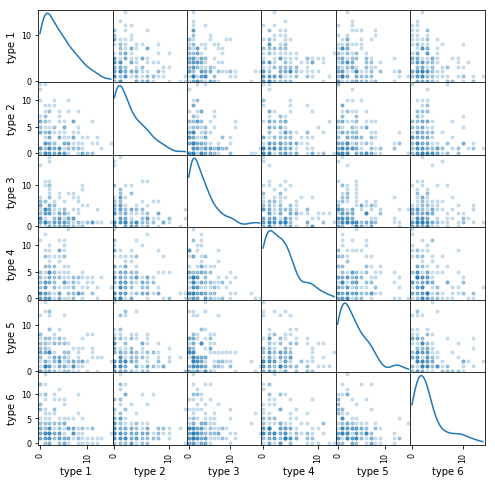

In [11]:
df = pd.DataFrame(samples, columns=['type 1', 'type 2', 'type 3', 'type 4', 'type 5', 'type 6'])
sm = scatter_matrix(df, alpha=0.2, figsize=(8, 8), diagonal='kde')
plt.savefig('samples.pdf', bbox_inches='tight')
eplt.show()


In [56]:
b = a.sum(axis=1)
print(b)

[ 94.40893019  82.55474661  69.51431724  79.08232212  71.89006863
  36.11886404  46.83421592  68.06608523  75.62005486  91.38680799]


In [57]:
a_new = a[np.sum(a, axis=1) > 93]
print(a_new)

[[ 22.44087366  23.15143971   8.02764413  17.15207167   4.7139803
   18.92292072]]


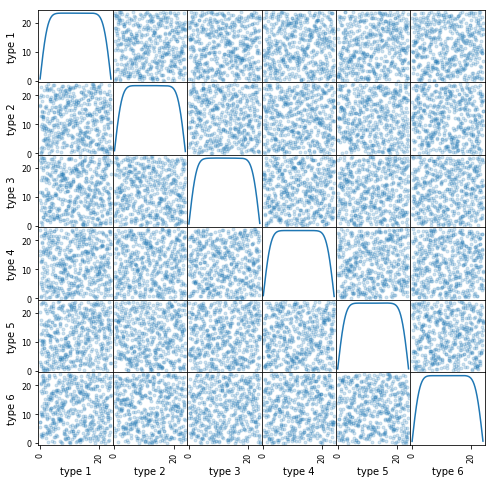

new candidate solution found with max,abs corrcoef = 0.9988425609644247


In [47]:
import pyDOE
a = pyDOE.lhs(6, samples=500, criterion='corr') * 24


df = pd.DataFrame(a, columns=['type 1', 'type 2', 'type 3', 'type 4', 'type 5', 'type 6'])
sm = scatter_matrix(df, alpha=0.2, figsize=(8, 8), diagonal='kde')
plt.show()


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

s = pd.Series([1,3,5,np.nan,6, 8])


In [30]:
from pandas.tools.plotting import scatter_matrix
import matplotlib.gridspec as gridspec

In [0]:
a = plt.plot(list(range(4)))
print(type(a))
print(a)

In [0]:
plt.gca()
plt.gcf()

In [0]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
a = plt.subplot(211)
print(type(a))
print(a)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

In [39]:
a = np.array([(10, 10, 10, 10),
     (10,  12, 13, 19),
     (10,  10, 11, 15),
     (10,  12, 13, 19)])
df1 = pd.DataFrame(a, columns= ['a', 'b', 'c', 'd'])
sm1 = scatter_matrix(df1, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

LinAlgError: singular matrix

In [0]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
sm = scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

In [0]:
b = np.random.randn(100, 10)
print(b)